In [5]:
import cv2

In [6]:
extraction_path=r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames3"

In [7]:
# Path to the video file
video_path = 'dataD.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) of the video
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Release the video capture object
cap.release()

print(f"The frames per second (fps) of the video is: {fps}")

The frames per second (fps) of the video is: 23


In [8]:
import cv2
import os

# Path to the video file
video_path = 'dataD.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) of the video
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the directory where frames will be saved
extraction_path = r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames3"

# Make sure the extraction directory exists; if not, create it
if not os.path.exists(extraction_path):
    os.makedirs(extraction_path)

# Initialize frame counter
frame_counter = 1

# Loop through the video frames
while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Save the frame with a filename like "frame1.jpg" in the specified directory
    frame_filename = os.path.join(extraction_path, f'frame{frame_counter}.jpg')
    cv2.imwrite(frame_filename, frame)
    
    frame_counter += 1

# Release the video capture object
cap.release()

print(f"The frames per second (fps) of the video is: {fps}")


The frames per second (fps) of the video is: 23


# (i) Object Detection and Bounding Boxes

# (ii) Counting People

# (iii) Screen Time Calculation


In [9]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
# weights - neural network parameters like bias,propagation etcc.
# cfg - configuration , architecture

In [11]:
extraction_path=r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames3"

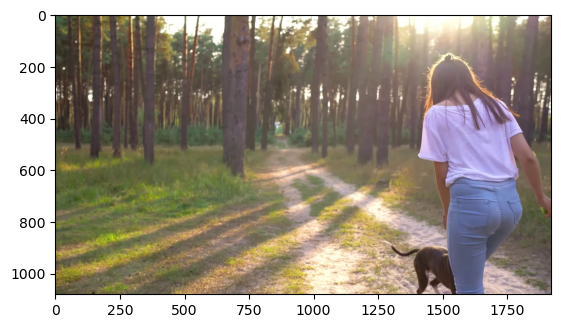

In [12]:
import matplotlib.pyplot as plt
img = plt.imread(r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames3\frame23.jpg")   # reading image using its name
plt.imshow(img)

In [14]:
print(frame_counter)

273


# Human detection

In [31]:
import numpy as np

max_person_id=0

# Initialize an empty dictionary to track detected persons and their trackers
detected_persons = {}
current_person_id = 0
printed_person_ids = set()
class_ids=[]
data=[]



for i in range(1, frame_counter):

    frame_path = extraction_path + "\\frame%d.jpg" % i
    image = cv2.imread(frame_path)
    height, width = image.shape[:2]

    # Preprocess the frames for YOLOv3
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), swapRB=True, crop=False)
    # 0.00392 - scaling factor
    
    net.setInput(blob)
    # setting inout data to neural network

    # Get output
    outs = net.forward(net.getUnconnectedOutLayersNames())
    # output of neural network after pass
    
    # Thresholds
    conf_threshold = 0.5
    nms_threshold = 0

    confidences = []
    boxes = []

    # Detection process
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > conf_threshold and class_id == 0:  # class_id = 0 means people
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    # Apply Non-Maximum Suppression (NMS)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    # Reset the person ID when it reaches 2
    current_person_id = 0

    # Draw bounding boxes without tracking
    for index in indices:
        x, y, w, h = boxes[index]
        color = (0, 255, 0)  # Green color
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 3)
        
        # Increment the person ID
        current_person_id += 1
        max_person_id = max(max_person_id, current_person_id)  # Update max_person_id

        # Append the data as a dictionary
        data.append({
            "Frame Name": f"frame{i}.jpg",
            "Person ID": current_person_id,
        })

        printed_person_ids.add(current_person_id)

    # Display the frame with bounding boxes
    resized_image = cv2.resize(image, (800, 600))
    cv2.imshow("Bounding box", resized_image)

    key = cv2.waitKey(1)

    if key == ord('q'):
        break

print("indeces ",indices)
cv2.destroyAllWindows()

indeces  [0]


# Counting people

In [32]:
print("total person in the video ",max_person_id)
# printed uing the count of current_person_id if an new id is created means a count will be added on 

total person in the video  1


# Calculate screen time of each person

In [32]:
# WORST QUALITY
# from pytube import YouTube as yt
# video_link = "https://www.youtube.com/watch?v=9h2bKsJ7j_c"
# vid = yt(video_link)
# stream = vid.streams.first()
# stream.download()

In [33]:
import pandas as pd
df=pd.DataFrame(data)
df

,Frame Name,Person ID
0,frame1.jpg,1
1,frame2.jpg,1
2,frame3.jpg,1
3,frame4.jpg,1
4,frame5.jpg,1
...,...,...
251,frame268.jpg,1
252,frame269.jpg,1
253,frame270.jpg,1
254,frame271.jpg,1


In [34]:
csv_file = 'dataD.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_file, index=False)

data = pd.read_csv('dataD.csv')

In [35]:
first_person = len(data[data['Person ID'] == 1])

print(f"Count of 'First person  : {first_person} frames ")


Count of 'First person  : 256 frames 


In [36]:
total_time= frame_counter/fps
print("total time ",total_time)

screenTime_person1 = first_person /fps
print("First person screen time is  ",screenTime_person1)



total time  11.869565217391305
First person screen time is   11.130434782608695
